In [1]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from collections import Counter
from datetime import datetime
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



#set up everything so that the figures show up in the notebook
#init_notebook_mode(connected=True) 


df1 = pd.DataFrame.from_csv('Carsharing/OPENDATA_BOOKING_CARSHARING.csv', index_col=None, sep=";")
df2 = pd.DataFrame.from_csv('Carsharing/German City Population.csv', index_col=None, sep=",")

In [2]:
df1.head()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL
0,17842196,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-06-05 08:49:33,2014-01-12 13:00:00,2014-01-12 14:30:00,Nein,Nein,14.0,Bernkasteler Straße,401768,Bernkasteler Straße,401768,Station,Köln,Internet
1,18270895,100003,149335,045B17DDFAA4DCE1751DF14B2DFC2C3106C5E788,2013-06-25 14:12:08,2014-05-06 13:30:00,2014-05-06 19:00:00,Nein,Nein,84.0,ZOB Oldenburg,400346,ZOB Oldenburg,400346,Station,Oldenburg (Oldb),Internet
2,19054992,100012,151333,645B3B221397740C5DD3ACE9915B28D717697D1F,2013-08-01 07:20:47,2014-06-14 14:00:00,2014-06-22 10:30:00,Nein,Nein,1036.0,Hbf Stralsund,32961,Hbf Stralsund,32961,Station,Stralsund,Internet
3,19057626,100003,149540,00DF8A75463E3424010AF22F5292FB9499DBEFBD,2013-08-01 09:22:07,2014-02-01 15:00:00,2014-02-08 15:00:00,Nein,Nein,681.0,Donnersbergerbrücke,401104,Donnersbergerbrücke,401104,Station,München,Internet
4,19313282,100001,150574,6551685BE2457EC2944877C65423089CDD6EA6C2,2013-08-13 10:28:38,2014-05-16 14:45:00,2014-05-16 22:00:00,Ja,Ja,60.0,Hbf Fulda,404524,Hbf Fulda,404524,Station,Fulda,NaN


In [3]:
#plt.figure(figsize=(12,5))
#sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
#df1.describe()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548073 entries, 0 to 548072
Data columns (total 17 columns):
BOOKING_HAL_ID               548073 non-null int64
CATEGORY_HAL_ID              548073 non-null int64
VEHICLE_HAL_ID               548073 non-null int64
CUSTOMER_HAL_ID              548073 non-null object
DATE_BOOKING                 548073 non-null object
DATE_FROM                    548073 non-null object
DATE_UNTIL                   548073 non-null object
COMPUTE_EXTRA_BOOKING_FEE    548073 non-null object
TRAVERSE_USE                 548073 non-null object
DISTANCE                     547872 non-null float64
START_RENTAL_ZONE            548073 non-null object
START_RENTAL_ZONE_HAL_ID     548073 non-null int64
END_RENTAL_ZONE              548073 non-null object
END_RENTAL_ZONE_HAL_ID       548073 non-null int64
RENTAL_ZONE_HAL_SRC          548073 non-null object
CITY_RENTAL_ZONE             548073 non-null object
TECHNICAL_INCOME_CHANNEL     496097 non-null object
dtypes: f

In [5]:
df1.groupby('CITY_RENTAL_ZONE').count().head()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,START_RENTAL_ZONE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,TECHNICAL_INCOME_CHANNEL
CITY_RENTAL_ZONE,,,,,,,,,,,,,,,,
Aachen,2311,2311,2311,2311,2311,2311,2311,2311,2311,2311,2311,2311,2311,2311,2311,2115
Aschaffenburg,3436,3436,3436,3436,3436,3436,3436,3436,3436,3435,3436,3436,3436,3436,3436,2891
Augsburg,1890,1890,1890,1890,1890,1890,1890,1890,1890,1890,1890,1890,1890,1890,1890,1714
Bayreuth,136,136,136,136,136,136,136,136,136,136,136,136,136,136,136,130
Berlin,155517,155517,155517,155517,155517,155517,155517,155517,155517,155476,155517,155517,155517,155517,155517,143853


In [6]:
#df1['count'] = df1['CITY_RENTAL_ZONE'].map(df1['CITY_RENTAL_ZONE'].value_counts())
#df1.head()

In [7]:
df1['CITY_RENTAL_ZONE'].value_counts().head(10)

Berlin               155517
Köln                  96677
München               87955
Stuttgart             38106
Hamburg               20001
Frankfurt am Main     18097
Mannheim              10480
Freiburg               9780
Hannover               9078
Duisburg               8083
Name: CITY_RENTAL_ZONE, dtype: int64

In [8]:
type(df1['DATE_FROM'].iloc[0])

str

In [9]:
df1['DATE_FROM']=pd.to_datetime(df1['DATE_FROM'])
#df1.dtypes

In [10]:

df1['from_year']=df1.DATE_FROM.dt.year
df1['from_month']=df1.DATE_FROM.dt.month
df1['from_weekday']=df1.DATE_FROM.dt.weekday_name
# You can also do by using lambda function
df1['from_hour'] = df1['DATE_FROM'].apply(lambda time: time.hour)
df1['from_date']=df1['DATE_FROM'].apply(lambda time: time.date())
df1.head()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,...,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,from_year,from_month,from_weekday,from_hour,from_date
0,17842196,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-06-05 08:49:33,2014-01-12 13:00:00,2014-01-12 14:30:00,Nein,Nein,14.0,...,Bernkasteler Straße,401768,Station,Köln,Internet,2014,1,Sunday,13,2014-01-12
1,18270895,100003,149335,045B17DDFAA4DCE1751DF14B2DFC2C3106C5E788,2013-06-25 14:12:08,2014-05-06 13:30:00,2014-05-06 19:00:00,Nein,Nein,84.0,...,ZOB Oldenburg,400346,Station,Oldenburg (Oldb),Internet,2014,5,Tuesday,13,2014-05-06
2,19054992,100012,151333,645B3B221397740C5DD3ACE9915B28D717697D1F,2013-08-01 07:20:47,2014-06-14 14:00:00,2014-06-22 10:30:00,Nein,Nein,1036.0,...,Hbf Stralsund,32961,Station,Stralsund,Internet,2014,6,Saturday,14,2014-06-14
3,19057626,100003,149540,00DF8A75463E3424010AF22F5292FB9499DBEFBD,2013-08-01 09:22:07,2014-02-01 15:00:00,2014-02-08 15:00:00,Nein,Nein,681.0,...,Donnersbergerbrücke,401104,Station,München,Internet,2014,2,Saturday,15,2014-02-01
4,19313282,100001,150574,6551685BE2457EC2944877C65423089CDD6EA6C2,2013-08-13 10:28:38,2014-05-16 14:45:00,2014-05-16 22:00:00,Ja,Ja,60.0,...,Hbf Fulda,404524,Station,Fulda,NaN,2014,5,Friday,14,2014-05-16


In [11]:
#df1.dtypes

In [12]:
#weekdaymap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

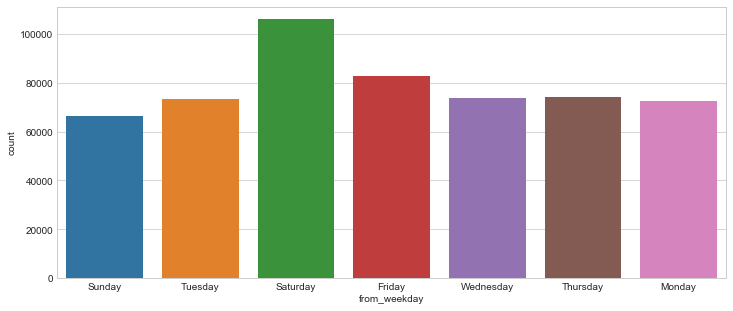

In [13]:
plt.figure(figsize=(12,5))
#df1['from_weekday'] = df1['from_weekday'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

sns.countplot(x='from_weekday', data = df1)

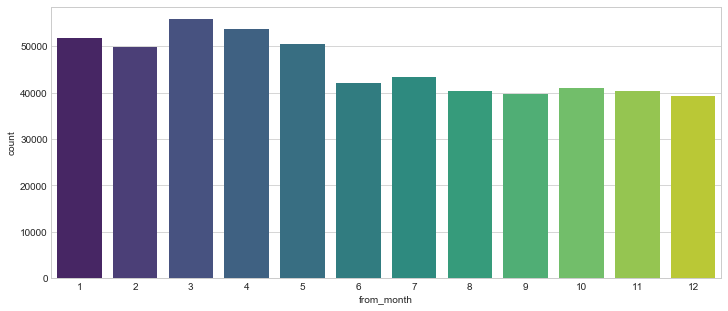

In [14]:
plt.figure(figsize=(12,5))
sns.countplot(x='from_month', data = df1, palette='viridis')

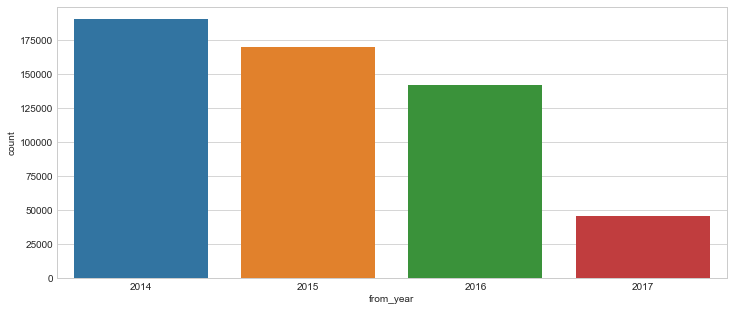

In [15]:
plt.figure(figsize=(12,5))
sns.countplot(x='from_year', data = df1)

In [16]:
byMonth = df1.groupby('from_month').count()
byMonth.head()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,...,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE,END_RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,from_year,from_weekday,from_hour,from_date
from_month,,,,,,,,,,,,,,,,,,,,,
1,51783,51783,51783,51783,51783,51783,51783,51783,51783,51783,...,51783,51783,51783,51783,51783,47471,51783,51783,51783,51783
2,49893,49893,49893,49893,49893,49893,49893,49893,49893,49893,...,49893,49893,49893,49893,49893,45165,49893,49893,49893,49893
3,55787,55787,55787,55787,55787,55787,55787,55787,55787,55785,...,55787,55787,55787,55787,55787,50692,55787,55787,55787,55787
4,53805,53805,53805,53805,53805,53805,53805,53805,53805,53801,...,53805,53805,53805,53805,53805,48903,53805,53805,53805,53805
5,50407,50407,50407,50407,50407,50407,50407,50407,50407,50213,...,50407,50407,50407,50407,50407,45540,50407,50407,50407,50407


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


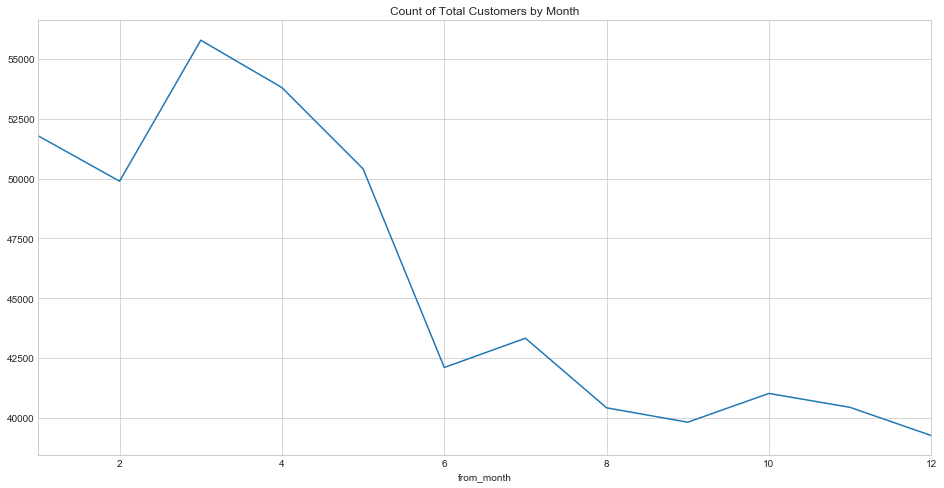

In [17]:
# Could be any column
plt.figure(figsize=(16,8))
#For more interactive visualization
import cufflinks as cf
cf.go_offline()
byMonth['CUSTOMER_HAL_ID'].plot(title='Count of Total Customers by Month')

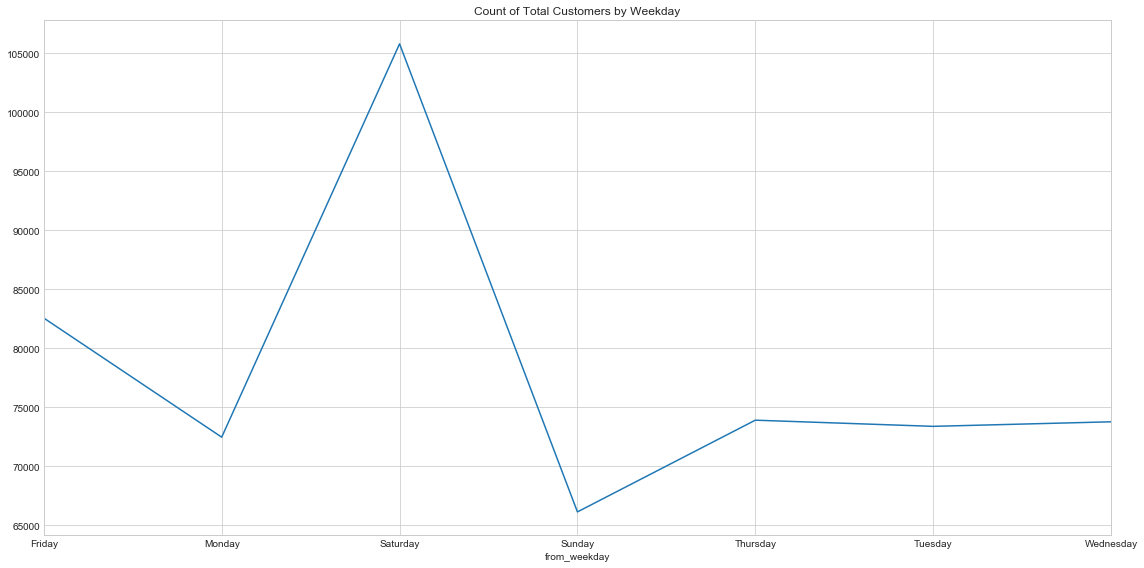

In [18]:
plt.figure(figsize=(16,8))
df1.groupby('from_weekday').count()['CUSTOMER_HAL_ID'].plot(title='Count of Total Customers by Weekday')
#plt.title('Number Of Customers')
plt.tight_layout()

In [19]:
#sns.lmplot(x='from_month',y='CUSTOMER_HAL_ID',data=byMonth.reset_index())

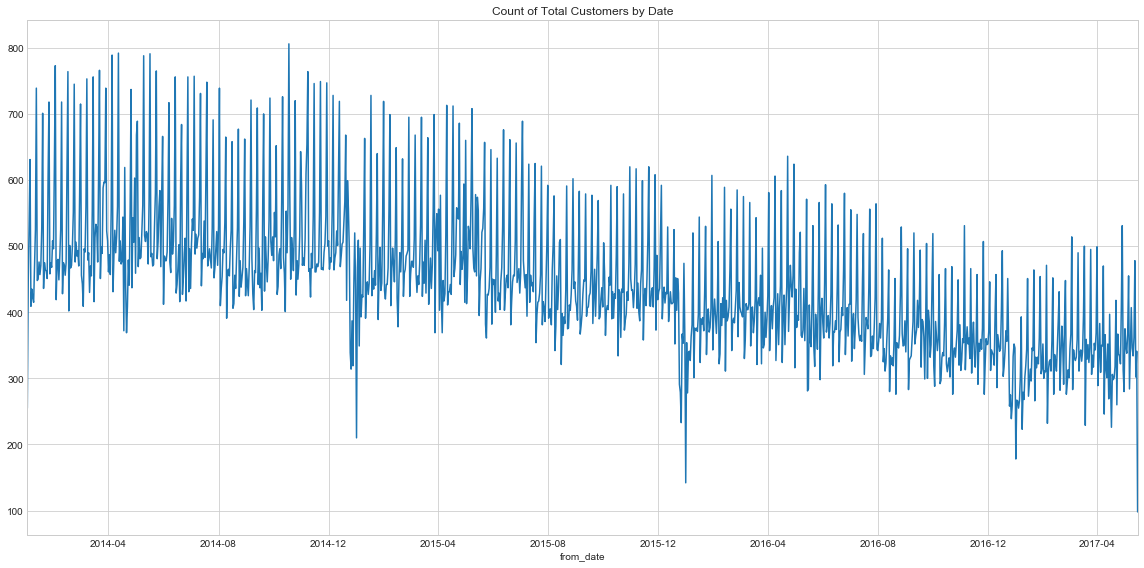

In [20]:
plt.figure(figsize=(16,8))
df1.groupby('from_date').count()['CUSTOMER_HAL_ID'].plot(title='Count of Total Customers by Date')
#plt.title('Number Of Customers')
plt.tight_layout()

In [21]:
df1['CITY_RENTAL_ZONE'].value_counts().head(5)

Berlin       155517
Köln          96677
München       87955
Stuttgart     38106
Hamburg       20001
Name: CITY_RENTAL_ZONE, dtype: int64

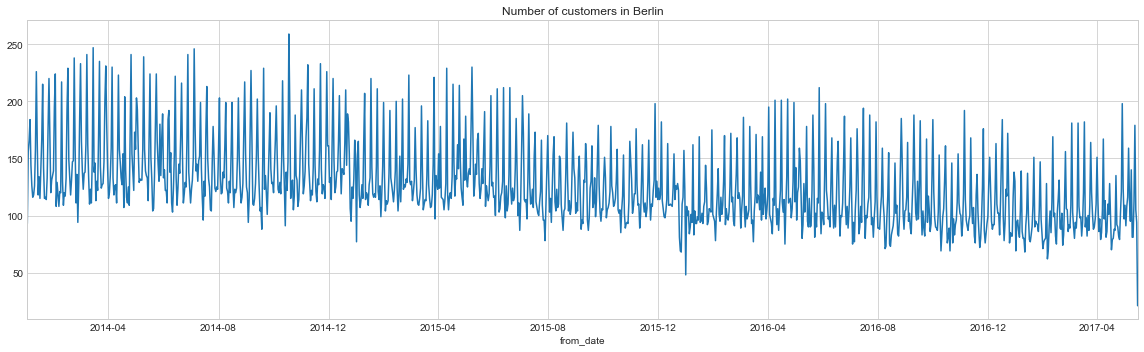

In [22]:
plt.figure(figsize=(16,5))
df1[df1['CITY_RENTAL_ZONE']=='Berlin'].groupby('from_date').count()['CUSTOMER_HAL_ID'].plot()
plt.title('Number of customers in Berlin')
plt.tight_layout()

In [23]:
plt.figure(figsize=(16,5))
df1[df1['CITY_RENTAL_ZONE']=='Hamburg'].groupby('from_date').count()['CUSTOMER_HAL_ID'].iplot()
#plt.title('Number of customers in Hamburg')
plt.tight_layout()

In [24]:
dayHour = df1.groupby(by=['from_weekday','from_hour']).count()['CUSTOMER_HAL_ID'].unstack()
dayHour.head()

from_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
from_weekday,,,,,,,,,,,,,,,,,,,,,
Friday,326,184,83,74,265,333,1187,3973,5798,6576,...,5900,5935,5951,6356,6142,4081,2531,1787,2232,915
Monday,337,183,98,86,171,556,1488,4722,6052,6221,...,4430,4310,4507,5060,5129,4017,2108,1342,1380,588
Saturday,501,284,182,117,229,472,837,2630,5920,10795,...,8968,6832,5786,5252,4872,3153,2140,1460,1699,819
Sunday,476,269,141,126,130,255,495,1210,2847,5132,...,6370,4628,3658,3327,2997,2336,1677,1264,1399,578
Thursday,296,167,107,65,184,486,1555,4742,6854,6695,...,4583,4249,4343,4907,5137,4002,2339,1493,1586,681


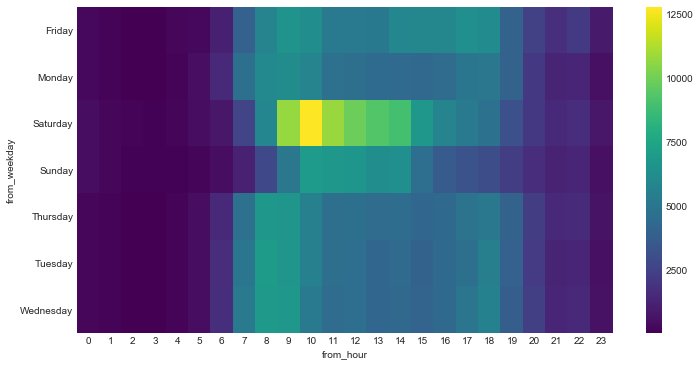

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

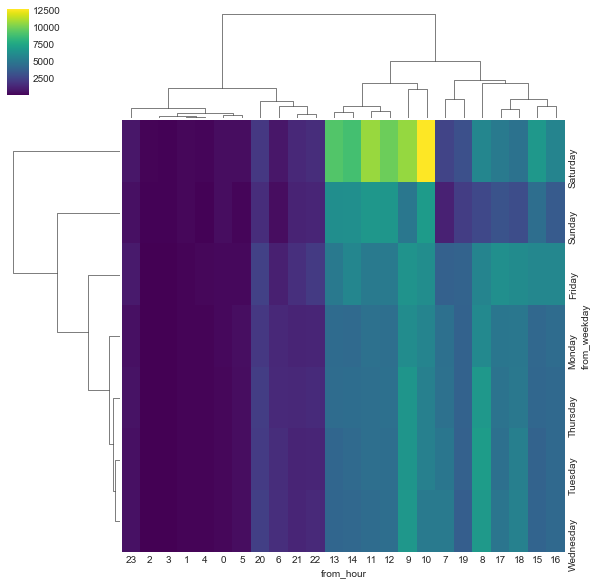

In [26]:
sns.clustermap(dayHour,cmap='viridis')

In [27]:
dayMonth = df1.groupby(by=['from_weekday','from_month']).count()['CUSTOMER_HAL_ID'].unstack()
dayMonth.head()

from_month,1,2,3,4,5,6,7,8,9,10,11,12
from_weekday,,,,,,,,,,,,
Friday,8483,7467,7814,7569,8025,6163,6941,6127,6074,6618,5626,5660
Monday,6657,6926,7683,6543,6510,6026,5112,5516,5477,5097,5457,5470
Saturday,10365,9714,10635,10971,10046,7808,8228,8228,7176,8106,8003,6529
Sunday,6134,5818,6888,6280,6213,5171,5179,5170,4648,4905,5545,4190
Thursday,7029,6660,7578,7475,6477,5515,6124,5053,5250,5950,5172,5631


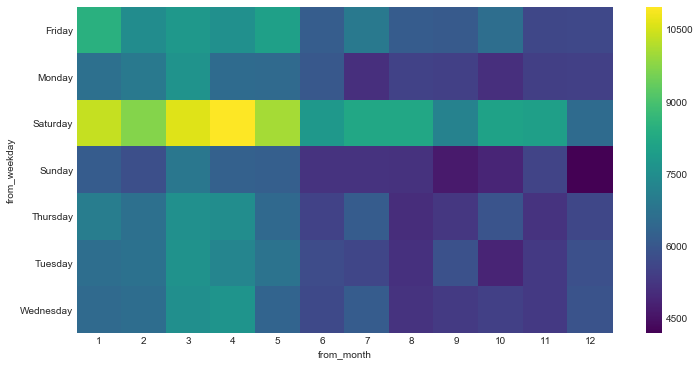

In [28]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

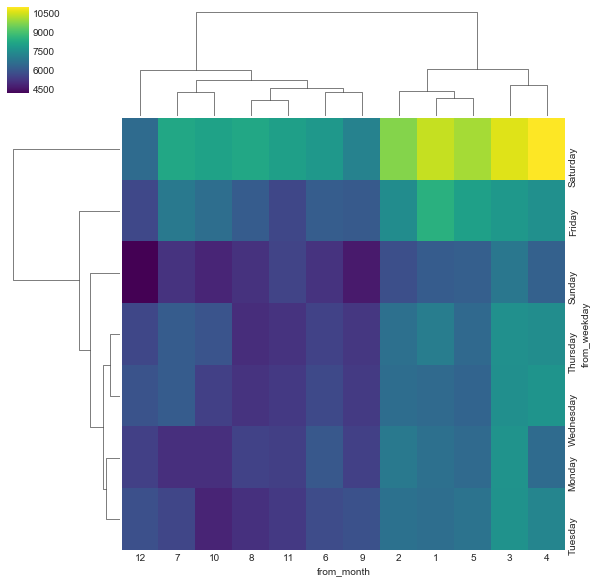

In [29]:
sns.clustermap(dayMonth,cmap='viridis')

In [30]:
#Extra booking fee if the booking is by telephone
df1['Extra_Bookingfee']=df1['COMPUTE_EXTRA_BOOKING_FEE'].map({'Nein' : 0, 'Ja' :1}).astype(int)

#TRAVERSE_USE : Indicates if this is a cross use 
df1['Travels']=df1['TRAVERSE_USE'].map({'Nein' : 0, 'Ja' :1}).astype(int)

# Station is  maped as 1
df1['Station']=df1['RENTAL_ZONE_HAL_SRC'].map({'Station' :1}).astype(int)
df1.head()

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,CUSTOMER_HAL_ID,DATE_BOOKING,DATE_FROM,DATE_UNTIL,COMPUTE_EXTRA_BOOKING_FEE,TRAVERSE_USE,DISTANCE,...,CITY_RENTAL_ZONE,TECHNICAL_INCOME_CHANNEL,from_year,from_month,from_weekday,from_hour,from_date,Extra_Bookingfee,Travels,Station
0,17842196,100012,150359,9680D41CFEFE292240253676FF6DD6C242B98EFD,2013-06-05 08:49:33,2014-01-12 13:00:00,2014-01-12 14:30:00,Nein,Nein,14.0,...,Köln,Internet,2014,1,Sunday,13,2014-01-12,0,0,1
1,18270895,100003,149335,045B17DDFAA4DCE1751DF14B2DFC2C3106C5E788,2013-06-25 14:12:08,2014-05-06 13:30:00,2014-05-06 19:00:00,Nein,Nein,84.0,...,Oldenburg (Oldb),Internet,2014,5,Tuesday,13,2014-05-06,0,0,1
2,19054992,100012,151333,645B3B221397740C5DD3ACE9915B28D717697D1F,2013-08-01 07:20:47,2014-06-14 14:00:00,2014-06-22 10:30:00,Nein,Nein,1036.0,...,Stralsund,Internet,2014,6,Saturday,14,2014-06-14,0,0,1
3,19057626,100003,149540,00DF8A75463E3424010AF22F5292FB9499DBEFBD,2013-08-01 09:22:07,2014-02-01 15:00:00,2014-02-08 15:00:00,Nein,Nein,681.0,...,München,Internet,2014,2,Saturday,15,2014-02-01,0,0,1
4,19313282,100001,150574,6551685BE2457EC2944877C65423089CDD6EA6C2,2013-08-13 10:28:38,2014-05-16 14:45:00,2014-05-16 22:00:00,Ja,Ja,60.0,...,Fulda,NaN,2014,5,Friday,14,2014-05-16,1,1,1


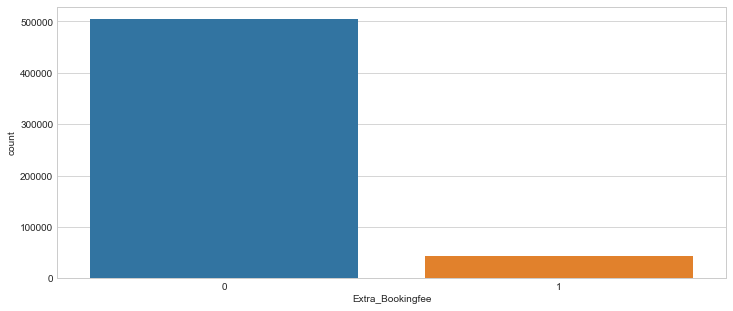

In [31]:
plt.figure(figsize=(12,5))
sns.countplot(x='Extra_Bookingfee', data = df1)

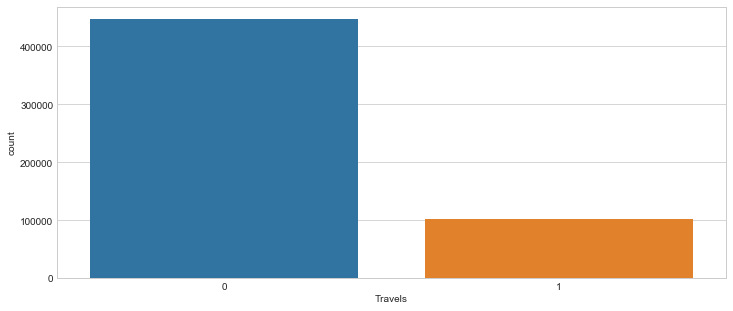

In [32]:
plt.figure(figsize=(12,5))
sns.countplot(x='Travels', data = df1)

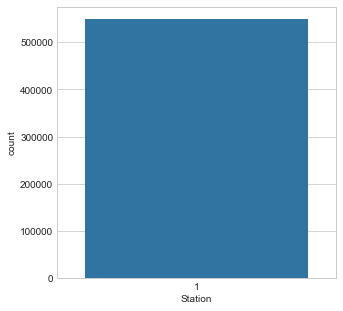

In [33]:
plt.figure(figsize=(5,5))
sns.countplot(x='Station', data = df1)

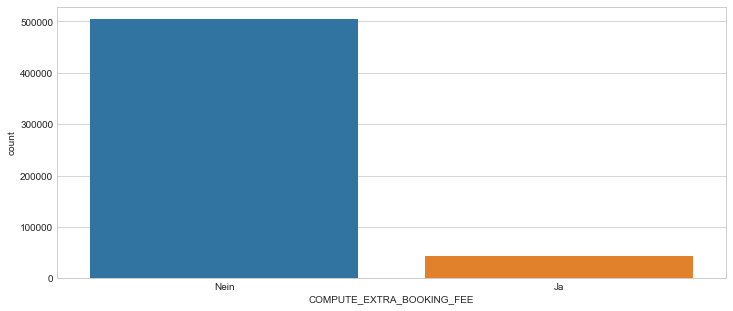

In [34]:
plt.figure(figsize=(12,5))
sns.countplot(x='COMPUTE_EXTRA_BOOKING_FEE', data = df1)

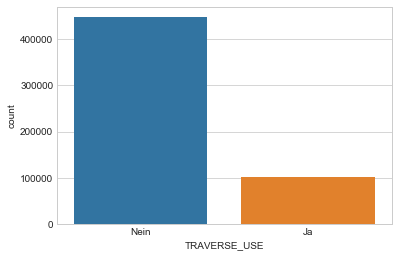

In [35]:
sns.countplot(x='TRAVERSE_USE', data = df1)

In [36]:
df1['RENTAL_ZONE_HAL_SRC'].value_counts()

Station    548073
Name: RENTAL_ZONE_HAL_SRC, dtype: int64

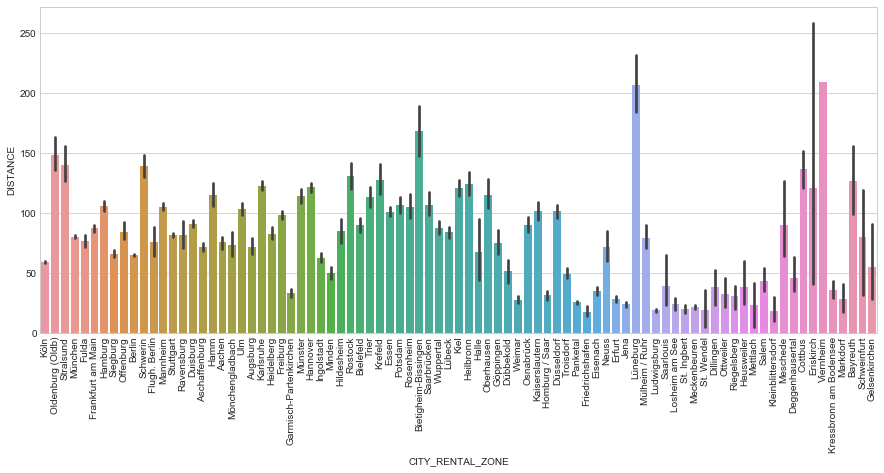

In [37]:

fig,ax = plt.subplots(figsize=(15,6))
sns.barplot(x='CITY_RENTAL_ZONE', y='DISTANCE', data =df1)
ticks = plt.setp(ax.get_xticklabels(),rotation=90)


In [38]:
df1.dtypes

BOOKING_HAL_ID                        int64
CATEGORY_HAL_ID                       int64
VEHICLE_HAL_ID                        int64
CUSTOMER_HAL_ID                      object
DATE_BOOKING                         object
DATE_FROM                    datetime64[ns]
DATE_UNTIL                           object
COMPUTE_EXTRA_BOOKING_FEE            object
TRAVERSE_USE                         object
DISTANCE                            float64
START_RENTAL_ZONE                    object
START_RENTAL_ZONE_HAL_ID              int64
END_RENTAL_ZONE                      object
END_RENTAL_ZONE_HAL_ID                int64
RENTAL_ZONE_HAL_SRC                  object
CITY_RENTAL_ZONE                     object
TECHNICAL_INCOME_CHANNEL             object
from_year                             int64
from_month                            int64
from_weekday                         object
from_hour                             int64
from_date                            object
Extra_Bookingfee                

In [39]:
df1.isnull().any()

BOOKING_HAL_ID               False
CATEGORY_HAL_ID              False
VEHICLE_HAL_ID               False
CUSTOMER_HAL_ID              False
DATE_BOOKING                 False
DATE_FROM                    False
DATE_UNTIL                   False
COMPUTE_EXTRA_BOOKING_FEE    False
TRAVERSE_USE                 False
DISTANCE                      True
START_RENTAL_ZONE            False
START_RENTAL_ZONE_HAL_ID     False
END_RENTAL_ZONE              False
END_RENTAL_ZONE_HAL_ID       False
RENTAL_ZONE_HAL_SRC          False
CITY_RENTAL_ZONE             False
TECHNICAL_INCOME_CHANNEL      True
from_year                    False
from_month                   False
from_weekday                 False
from_hour                    False
from_date                    False
Extra_Bookingfee             False
Travels                      False
Station                      False
dtype: bool

In [40]:
df1.shape

(548073, 25)

In [41]:
len(df1['BOOKING_HAL_ID'].unique())

548073

In [42]:
len(df1['CATEGORY_HAL_ID'].unique())

55

In [43]:
len(df1['VEHICLE_HAL_ID'].unique())

1785

In [44]:
len(df1['CUSTOMER_HAL_ID'].unique())

56686

In [45]:
len(df1['CITY_RENTAL_ZONE'].unique())

85

In [46]:
len(df1['START_RENTAL_ZONE'].unique())

411

In [47]:
len(df1['END_RENTAL_ZONE'].unique())

411

In [48]:
dates = [pd.to_datetime(date) for date in df1['DATE_FROM']]
dates.sort()

In [49]:
dates[0]

Timestamp('2014-01-01 00:30:00')

In [50]:
dates[-1]

Timestamp('2017-05-16 09:30:00')

In [51]:
#df1[['DISTANCE','CITY_RENTAL_ZONE','DATE_BOOKING']].plot()

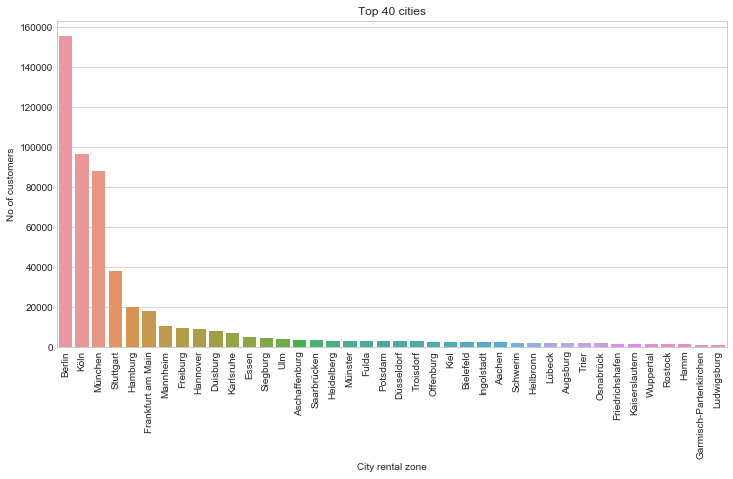

In [52]:
city_count = Counter(df1['CITY_RENTAL_ZONE'].dropna().tolist()).most_common(40)
city_idx = [CITY_RENTAL_ZONE[0] for CITY_RENTAL_ZONE in city_count]
city_val = [CITY_RENTAL_ZONE[1] for CITY_RENTAL_ZONE in city_count]
fig,ax = plt.subplots(figsize=(12,6))
sns.barplot(x = city_idx,y=city_val ,ax =ax)
plt.title('Top 40 cities')
plt.xlabel('City rental zone')
plt.ylabel('No of customers')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

In [53]:
x = df1['BOOKING_HAL_ID']
#x = df1['CITY_RENTAL_ZONE']

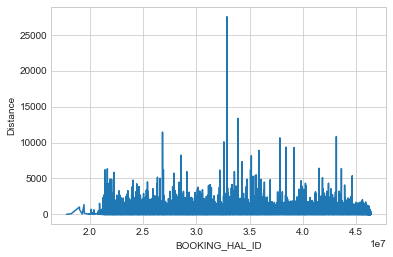

In [54]:
y = df1['DISTANCE']
plt.xlabel('BOOKING_HAL_ID')
plt.ylabel('Distance')
plt.plot(x,y)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000029037DF9940>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000029037EB59B0>], dtype=object)

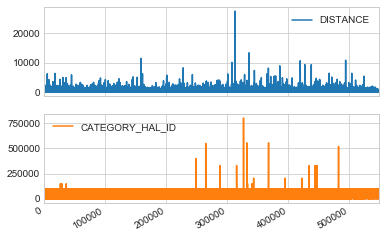

In [55]:
df1[['DISTANCE', 'CATEGORY_HAL_ID']].plot(subplots=True, legend =True)

In [56]:
df1['CITY_RENTAL_ZONE'].value_counts().head(10)

Berlin               155517
Köln                  96677
München               87955
Stuttgart             38106
Hamburg               20001
Frankfurt am Main     18097
Mannheim              10480
Freiburg               9780
Hannover               9078
Duisburg               8083
Name: CITY_RENTAL_ZONE, dtype: int64

In [57]:
Customer_count =df1['CUSTOMER_HAL_ID'].value_counts()

In [58]:
#Customer_count

In [59]:
# These are the customers who book more thean 50 times. 
#Total customers are: Name: CUSTOMER_HAL_ID, Length: 1996
#df1['Highest'] = Customer_count[df1['CUSTOMER_HAL_ID'].value_counts()>50]
#df1['Highest']

In [60]:
#df1.head()

In [61]:
#df1.groupby('CITY_RENTAL_ZONE').count().loc['Berlin']

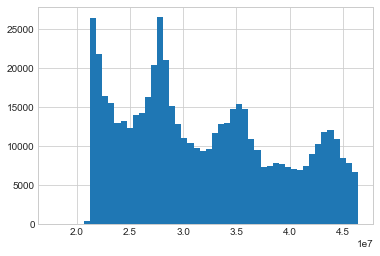

In [62]:
df1['BOOKING_HAL_ID'].hist(bins=50)

In [63]:
#df1.pandas.to_datetime('DATE_FROM')

In [64]:
#df1['CITY_RENTAL_ZONE'].hist(bins=50)

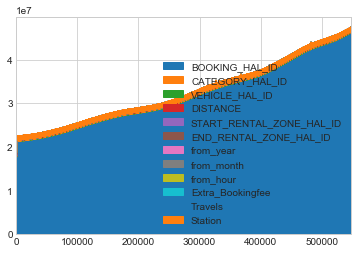

In [65]:
df1.plot.area()

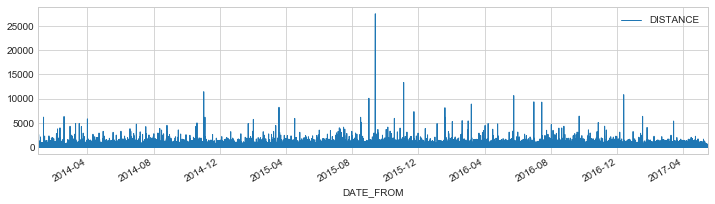

In [66]:
df1.plot.line(x='DATE_FROM',y='DISTANCE',figsize=(12,3),lw=1)

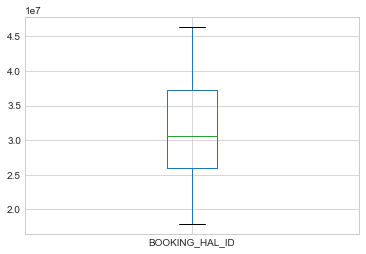

In [67]:
df1.boxplot(column='BOOKING_HAL_ID')

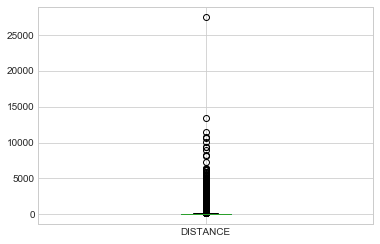

In [68]:
df1.boxplot(column='DISTANCE')

In [69]:
#df1.boxplot(column='BOOKING_HAL_ID', by = 'CITY_RENTAL_ZONE')

In [70]:
df1.apply(lambda x: sum(x.isnull()),axis=0) 

BOOKING_HAL_ID                   0
CATEGORY_HAL_ID                  0
VEHICLE_HAL_ID                   0
CUSTOMER_HAL_ID                  0
DATE_BOOKING                     0
DATE_FROM                        0
DATE_UNTIL                       0
COMPUTE_EXTRA_BOOKING_FEE        0
TRAVERSE_USE                     0
DISTANCE                       201
START_RENTAL_ZONE                0
START_RENTAL_ZONE_HAL_ID         0
END_RENTAL_ZONE                  0
END_RENTAL_ZONE_HAL_ID           0
RENTAL_ZONE_HAL_SRC              0
CITY_RENTAL_ZONE                 0
TECHNICAL_INCOME_CHANNEL     51976
from_year                        0
from_month                       0
from_weekday                     0
from_hour                        0
from_date                        0
Extra_Bookingfee                 0
Travels                          0
Station                          0
dtype: int64

In [71]:
all_booking = df1.set_index(['CUSTOMER_HAL_ID','DATE_FROM','CITY_RENTAL_ZONE']).sort_index()

In [72]:
all_booking

BOOKING_HAL_ID  \
CUSTOMER_HAL_ID                          DATE_FROM           CITY_RENTAL_ZONE                    
000157712485827C72C3949FCC2132560E25EBF5 2014-01-17 18:00:00 Köln                     21523199   
                                         2014-01-28 11:15:00 Köln                     21613456   
                                         2014-03-16 13:30:00 Köln                     22153324   
                                         2014-03-25 10:00:00 Köln                     22276087   
                                         2014-04-13 09:45:00 Köln                     22618144   
                                         2014-04-19 12:00:00 Köln                     22713870   
                                         2014-05-11 13:30:00 Köln                     23124314   
                                         2014-05-15 17:15:00 Köln                     23210888   
                                         2014-05-23 19:00:00 Köln                     23404729   
                                         2014-05-29 12:15:00 Köln                     23523600   
                                         2014-06-29 14:00:00 Köln                     24217058   
                                         2014-08-03 15:00:00 Köln                     25052658   
                                         2014-08-04 19:00:00 Köln                     25071596   
                                         2014-08-28 16:45:00 Köln                     25575707   
                                         2014-09-14 12:00:00 Köln                     25919058   
                                         2014-10-05 15:00:00 Köln                     26360817   
                                         2014-10-08 18:45:00 Köln                     26421414   
                                         2014-10-19 12:00:00 Köln                     26635768   
                                         2014-11-08 11:00:00 Köln                     27004112   
                                         2014-11-21 11:00:00 Köln                     27216421   
                                         2014-12-13 09:45:00 Köln                     27521983   
                                         2014-12-17 17:30:00 Köln                     27576291   
                                         2014-12-23 11:00:00 Köln                     27634306   
                                         2015-01-05 12:00:00 Köln                     27714552   
                                         2015-01-07 08:00:00 Köln                     27744284   
                                         2015-01-16 09:30:00 Köln                     27842117   
                                         2015-01-22 18:00:00 Köln                     27923996   
                                         2015-01-30 08:45:00 Köln                     27996794   
                                         2015-02-05 16:00:00 Köln                     28076940   
                                         2015-02-07 09:00:00 Köln                     28095426   
...                                                                                        ...   
FFF10EC9902DE4A8E2711703D474E8D94E3A8742 2016-09-15 17:30:00 Frankfurt am Main        41361201   
FFF5752AB1FA81FA041E8B1FB380EDDD6E7BFBD6 2015-09-14 12:15:00 München                  32884522   
                                         2015-09-15 16:00:00 München                  32924527   
                                         2015-11-23 10:00:00 München                  34314672   
                                         2015-12-30 10:15:00 München                  34927074   
                                         2016-03-28 12:00:00 München                  36323598   
                                         2016-07-16 14:30:00 München                  39486705   
                                         2016-10-27 17:30:00 München                  42371385   
FFF59CDAA7CA4C6B248624CBAFAEE134D7319B37 2015-06-26 19:30:00 U

In [73]:
plt.figure(figsize=(16,5))
all_booking = df1.set_index(['CUSTOMER_HAL_ID','DATE_FROM','CITY_RENTAL_ZONE']).sort_index()
all_booking
plt.tight_layout()

In [74]:
city = df1["CITY_RENTAL_ZONE"]
city.shape

(548073,)

In [75]:
city.values
city.index

RangeIndex(start=0, stop=548073, step=1)

,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,DISTANCE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE_HAL_ID,from_year,from_month,from_hour,Extra_Bookingfee,Travels,Station
BOOKING_HAL_ID,1.000000,0.004147,0.783376,0.022688,-0.003733,-0.003733,0.948017,0.122936,-0.026121,-0.005320,0.013802,NaN
CATEGORY_HAL_ID,0.004147,1.000000,-0.017161,-0.009987,0.010179,0.010179,0.004296,-0.007497,0.001904,0.001669,0.011499,NaN
VEHICLE_HAL_ID,0.783376,-0.017161,1.000000,0.053523,-0.042574,-0.042574,0.744224,0.082767,-0.036126,0.017117,0.019998,NaN
DISTANCE,0.022688,-0.009987,0.053523,1.000000,-0.065380,-0.065380,0.021601,0.018855,-0.113406,0.084418,-0.041103,NaN
START_RENTAL_ZONE_HAL_ID,-0.003733,0.010179,-0.042574,-0.065380,1.000000,1.000000,-0.005519,0.000746,0.008416,-0.053034,0.016238,NaN
END_RENTAL_ZONE_HAL_ID,-0.003733,0.010179,-0.042574,-0.065380,1.000000,1.000000,-0.005519,0.000746,0.008416,-0.053034,0.016238,NaN
from_year,0.948017,0.004296,0.744224,0.021601,-0.005519,-0.005519,1.000000,-0.188712,-0.027603,-0.007580,0.014616,NaN
from_month,0.122936,-0.007497,0.082767,0.018855,0.000746,0.000746,-0.188712,1.000000,-0.007242,0.004347,0.000021,NaN
from_hour,-0.026121,0.001904,-0.036126,-0.113406,0.008416,0.008416,-0.027603,-0.007242,1.000000,-0.042777,0.068766,NaN
Extra_Bookingfee,-0.005320,0.001669,0.017117,0.084418,-0.053034,-0.053034,-0.007580,0.004347,-0.042777,1.000000,-0.006926,NaN


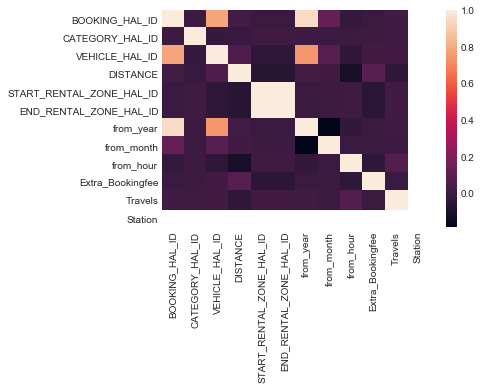

In [76]:
#Correlation Matrix
corr = df1.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr


In [77]:
df1.corr()


,BOOKING_HAL_ID,CATEGORY_HAL_ID,VEHICLE_HAL_ID,DISTANCE,START_RENTAL_ZONE_HAL_ID,END_RENTAL_ZONE_HAL_ID,from_year,from_month,from_hour,Extra_Bookingfee,Travels,Station
BOOKING_HAL_ID,1.000000,0.004147,0.783376,0.022688,-0.003733,-0.003733,0.948017,0.122936,-0.026121,-0.005320,0.013802,NaN
CATEGORY_HAL_ID,0.004147,1.000000,-0.017161,-0.009987,0.010179,0.010179,0.004296,-0.007497,0.001904,0.001669,0.011499,NaN
VEHICLE_HAL_ID,0.783376,-0.017161,1.000000,0.053523,-0.042574,-0.042574,0.744224,0.082767,-0.036126,0.017117,0.019998,NaN
DISTANCE,0.022688,-0.009987,0.053523,1.000000,-0.065380,-0.065380,0.021601,0.018855,-0.113406,0.084418,-0.041103,NaN
START_RENTAL_ZONE_HAL_ID,-0.003733,0.010179,-0.042574,-0.065380,1.000000,1.000000,-0.005519,0.000746,0.008416,-0.053034,0.016238,NaN
END_RENTAL_ZONE_HAL_ID,-0.003733,0.010179,-0.042574,-0.065380,1.000000,1.000000,-0.005519,0.000746,0.008416,-0.053034,0.016238,NaN
from_year,0.948017,0.004296,0.744224,0.021601,-0.005519,-0.005519,1.000000,-0.188712,-0.027603,-0.007580,0.014616,NaN
from_month,0.122936,-0.007497,0.082767,0.018855,0.000746,0.000746,-0.188712,1.000000,-0.007242,0.004347,0.000021,NaN
from_hour,-0.026121,0.001904,-0.036126,-0.113406,0.008416,0.008416,-0.027603,-0.007242,1.000000,-0.042777,0.068766,NaN
Extra_Bookingfee,-0.005320,0.001669,0.017117,0.084418,-0.053034,-0.053034,-0.007580,0.004347,-0.042777,1.000000,-0.006926,NaN


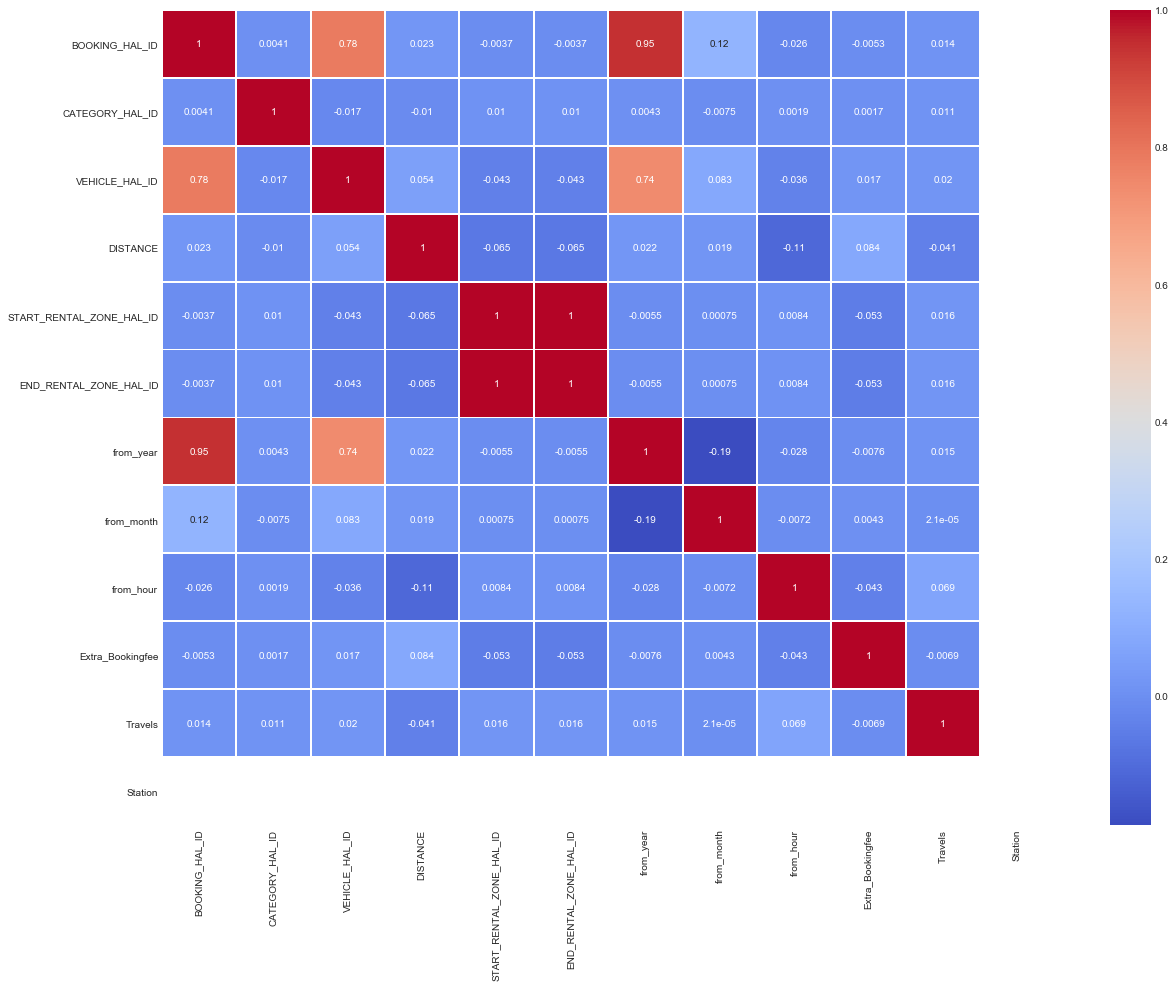

In [78]:
tc=df1.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(tc, annot =True, cmap ='coolwarm', linewidths=.9)

In [79]:
df2.head(150)

,CITY_RENTAL_ZONE,2017 Population
0,Berlin,3426354
1,Hamburg,1739117
2,München,1260391
3,Köln,963395
4,Frankfurt am Main,650000
5,Essen,593085
6,Stuttgart,589793
7,Dortmund,588462
8,Düsseldorf,573057
9,Bremen,546501


In [80]:
df2.dtypes

CITY_RENTAL_ZONE    object
2017 Population      int64
dtype: object

In [81]:
df2.describe()

,2017 Population
count,3.990000e+02
mean,1.113985e+05
std,2.235941e+05
min,3.353900e+04
25%,4.183500e+04
50%,5.401200e+04
75%,9.832100e+04
max,3.426354e+06


In [82]:
df2.isnull().any()

CITY_RENTAL_ZONE     True
2017 Population     False
dtype: bool

In [83]:
data = dict(type='choropleth',
            colorscale = 'YIOrRd',
            locations = df2['CITY_RENTAL_ZONE'],
            z = df2['2017 Population'],
            locationmode = 'GERMAN-states',
            text = df2['CITY_RENTAL_ZONE'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 3)),
            colorbar = {'title':"Germany City Population"}
            ) 

In [84]:
layout = dict(title = '2017 Germany population by city',
              geo = dict(scope='germany',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [85]:
choromap = go.Figure(data = [data],layout = layout)

NameError: name 'go' is not defined

In [ ]:
iplot(choromap)

In [ ]:
data = dict(
        type = 'choropleth',
        locations = ['BB', 'HH','HE'],   
    #locations = df2['CITY_RENTAL_ZONE'],
        z = df2['2017 Population'],
        text = df2['CITY_RENTAL_ZONE'],
        colorbar = {'title' : '2017 Germany population by city'},
      ) 

In [ ]:
layout = dict(
    title = '2017 Germany Population by city',
    geo = dict(
        showframe = False,
        projection = {'type':'Mercator'}
    )
)

In [ ]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [ ]:
mergedpopulation =pd.merge(df1,df2, on ='CITY_RENTAL_ZONE', how ='inner')
#merged.set_inxex('CITY_RENTAL_ZONE', implace=True) 
mergedpopulation

In [ ]:
mergedpopulation.corr()

In [ ]:
tc=mergedpopulation.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(tc, annot =True, cmap ='coolwarm')

In [ ]:
top40population=df2.head(40)
top40population

In [ ]:
fig,ax = plt.subplots(figsize=(20,6))
sns.barplot(x='CITY_RENTAL_ZONE', y='2017 Population', data =top40population)
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
